![Titanic](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/launch-titanic-1523648780.jpg)
 ##  Titanic Survival Prediction

### In this project I tried to make the best model for **Survival Prediction**.I experimented with various different ways of preprocessing ,  filling missing values , model training and hyperparameter tuning.
### I will be presenting all the things that I did in this project along with the changes I made to get a better prediction result which got me to **top 4%**.
### Throughout the project there will be some important **notes**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')
train = train_data.copy()
test = test_data.copy()

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)
pred = train_data['Survived']

In [5]:
train.head(5)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Plan of Action
### We will be looking at the following things:
  *     Data visualization
  *     Data Preprocessing
  *     Filling in missing values
  *     Encoding

## Missing Values

In [6]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### This is the list of our missing values from the training and test set.

# Features

### In this section we will look at all the features in our dataset. There will be visualization of data using different graphs and preprocessing on the training and test set.

### Note: Similar preprocessing will be done on training and test set. 

### 1. Sex

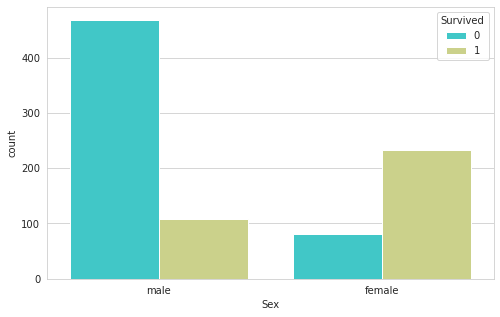

In [8]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Sex',hue='Survived',data=train_data,palette='rainbow')

In [9]:
sex1 = pd.get_dummies(train['Sex'])
sex2 = pd.get_dummies(test['Sex'])

train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

train = pd.concat([train,sex1],axis=1)
test = pd.concat([test,sex2],axis=1)

### Here  ".get_dummies()"  will convert this column and make 2 dummy columns of male and female. This is done in order to convert the categorical data into numerical.

In [10]:
train.drop(['female'],axis=1,inplace=True) 
test.drop(['female'],axis=1,inplace=True) 

### We will be dropping 1 column as we get all the necessary information from the other one.

## 2. Pclass

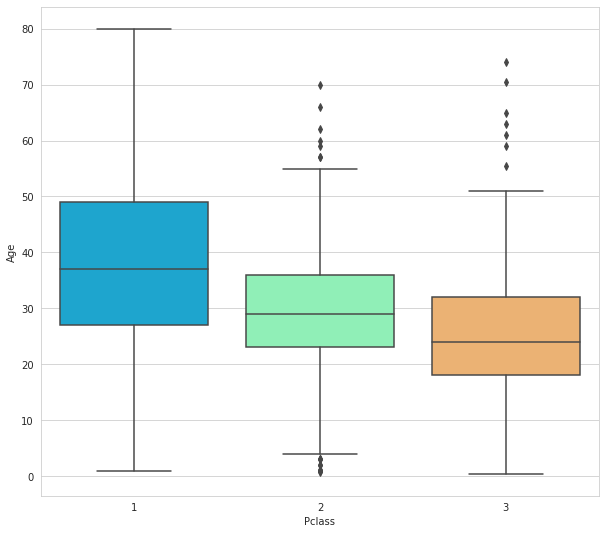

In [11]:
plt.figure(figsize=(10, 9))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='rainbow')


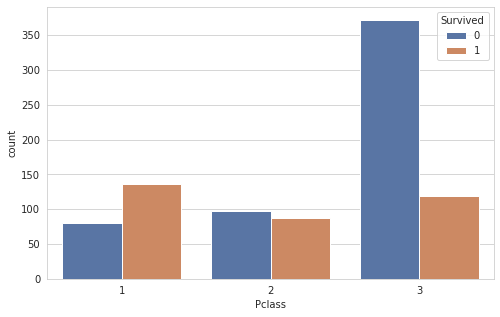

In [12]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Pclass',hue='Survived',data=train_data,palette='deep')

### Here we can see that people from higher class(**1 being the highest**) had a better chance of survival.

## 3. Age

Text(0, 0.5, 'Density')

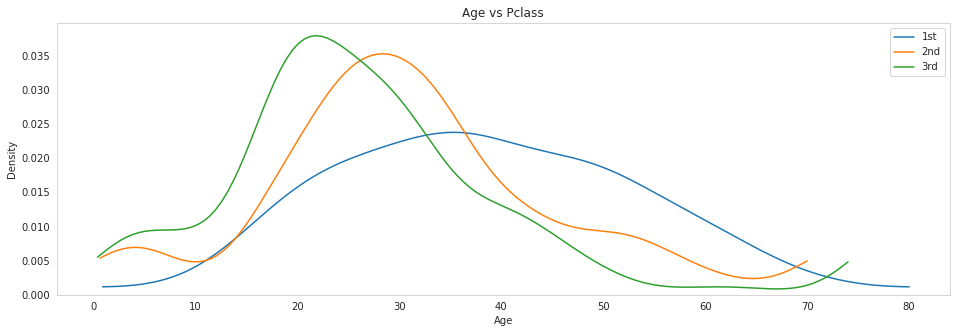

In [13]:
plt.figure(figsize=(16, 5))
for x in [1,2,3]:    ## for 3 classes
    sns.kdeplot(data=train_data.Age[train_data.Pclass == x],cut = 0, clip=(0,200)).grid(False)
    
plt.title("Age vs Pclass")
plt.legend(("1st","2nd","3rd"))
plt.xlabel("Age")
plt.ylabel("Density")

#### This graph shows the density of people who belong to the 3 class along with the age.

### The missing values have to be filled with the median value.

In [14]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Out of these all values, '**50%**' gives us the median value.

In [15]:
train["Age"].fillna(train['Age'].describe().loc[['50%']][0], inplace = True) 
test["Age"].fillna(test['Age'].describe().loc[['50%']][0], inplace = True) 

## 4. Fare

Text(0.5, 1.0, 'Fare distribution for all the people')

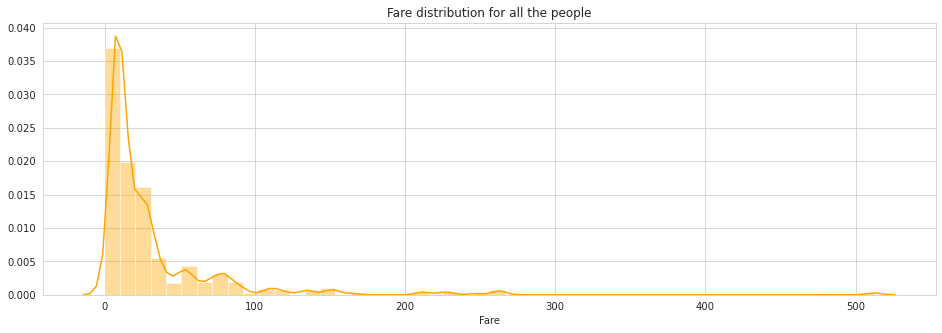

In [16]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(train["Fare"], color="orange",ax = axes)
plt.title("Fare distribution for all the people")

In [17]:
Fare_0 = []
Fare_1 = []
for i in range(0,891):
    if train_data["Survived"][i] == 0:
        Fare_0.append(train["Fare"][i])
    else:
        Fare_1.append(train["Fare"][i])

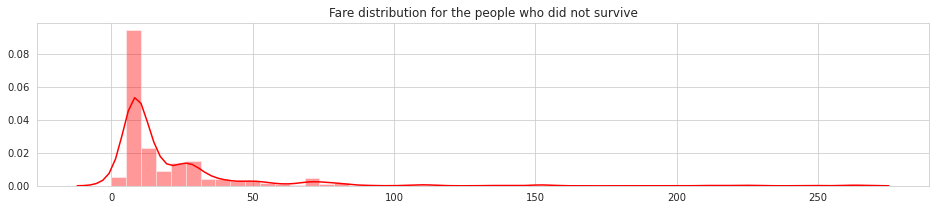

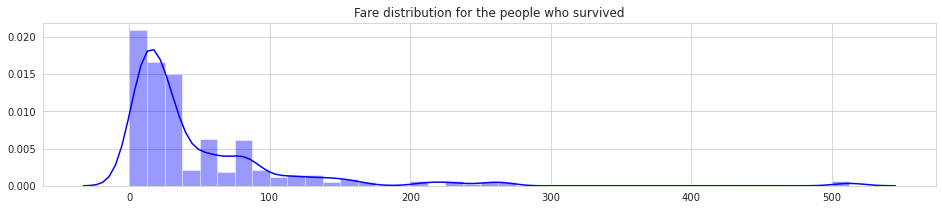

In [18]:
f, axes = plt.subplots(1,1, figsize = (16, 3))
g1 = sns.distplot(Fare_0, color="red",ax = axes)
plt.title("Fare distribution for the people who did not survive")

f, axes = plt.subplots(1,1, figsize = (16, 3))
g1 = sns.distplot(Fare_1, color="blue",ax = axes)
plt.title("Fare distribution for the people who survived")

plt.show()

In [19]:
test["Fare"].fillna(test['Fare'].describe().loc[['50%']][0], inplace = True) 

### "Fare" column tells us about the amount of money paid by the passengers. Here we can see that passengers had a greater probability of surviving if they had payed more.

## 5. Embarked

### This column holds the embarkation records for all the passengers.
#### They stand for:
* S - Southampton
* C - Cherbourg
* Q - Queenstown

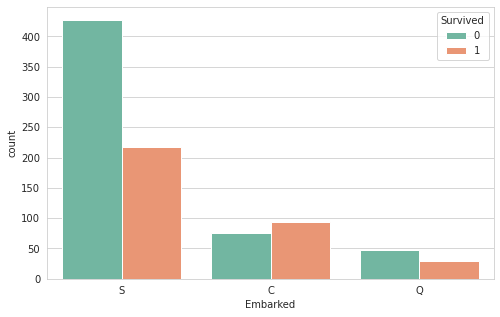

In [20]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Embarked',hue='Survived',data=train_data, palette = "Set2" )

In [21]:
train["Embarked"].fillna("S", inplace = True) 
test["Embarked"].fillna("S", inplace = True) 

### Filling the missing values with 'S' as it is the most frequently occuring value.

In [22]:
embark1 = pd.get_dummies(train['Embarked'])
embark2 = pd.get_dummies(test['Embarked'])

train.drop(['Embarked'],axis=1,inplace=True)
test.drop(['Embarked'],axis=1,inplace=True)

train = pd.concat([train,embark1],axis=1)
test = pd.concat([test,embark2],axis=1)

## 6. SibSp and Parch

### SibSp tells us about the passengers' siblings and spouse.
### Parch tells us about the passengers' parents and children.

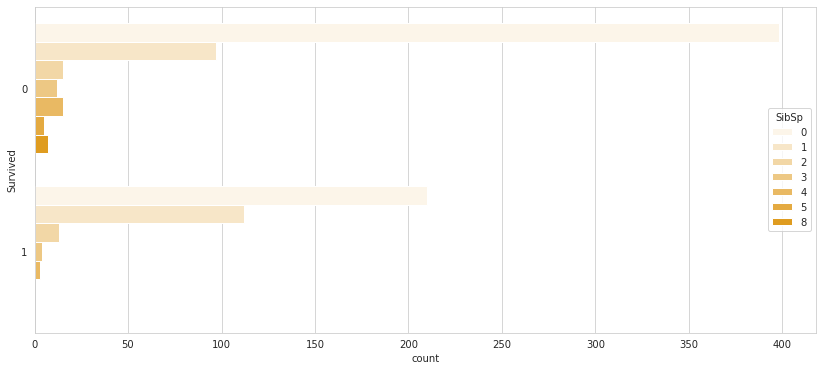

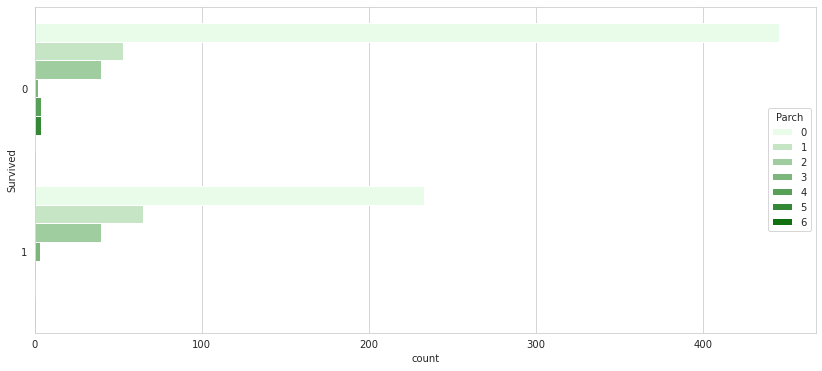

In [23]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(y="Survived", hue="SibSp", data=train ,color = "Orange" )

plt.figure(figsize=(14, 6))
ax = sns.countplot(y="Survived", hue="Parch", data=train , color = "Green" )

plt.show()

In [24]:
def fam(x):
    if  (x['SibSp'] + x['Parch'])  > 0:
        return 1
    else:
        return 0

train['Family'] = train.apply(fam, axis = 1)
test['Family'] = test.apply(fam, axis = 1)

### Here we will be combining the SibSp and Parch column into one column and determining whether the passenger has a family or not.

In [25]:
train = train.drop(['SibSp','Parch'],axis=1)
test = test.drop(['SibSp','Parch'],axis=1)

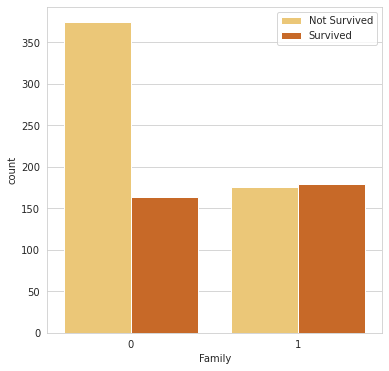

In [26]:
plt.figure(figsize=(6, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'Family',hue='Survived',data=train, palette="YlOrBr" )
plt.legend(("Not Survived","Survived"))

### Here we can see that a passenger having no family had a lesser chance of survival.

### Note: These 2 columns were not giving any valuable information/trend that could have helped in getting accurate prediction, hence they were combined.

## 7. Cabin

### "Cabin" is an interesting column telling us about the cabin which was occupied by the passenger.

In [27]:
train["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin'] ])
test["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin'] ])

#### Here we will be taking the prefix values of the cabin number. The missing values will be replaced with 'X'.

<Figure size 576x360 with 0 Axes>

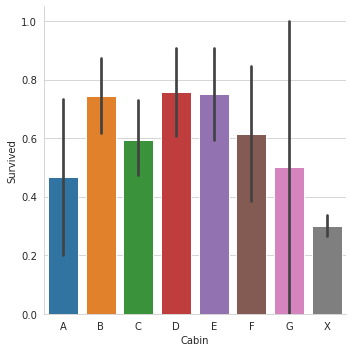

In [28]:
plt.figure(figsize=(8, 5))
g = sns.catplot(y="Survived",x="Cabin",data=train,kind="bar",order=['A','B','C','D','E','F','G','X'])


#### These cabins will be mapped with a numeric value.

In [29]:
train["Cabin"] = train["Cabin"].map({"X":0, "A":1, "B" : 2 , "C":3, "D":4, "E":5, "F":6, "G":7,"T":0})
train["Cabin"] = train["Cabin"].astype(int)
test["Cabin"] = test["Cabin"].map({"X":0, "A":1, "B" : 2 , "C":3, "D":4, "E":5, "F":6, "G":7,"T":0})
test["Cabin"] = test["Cabin"].astype(int)

### Note : This column has **not** helped me much ( I have explained about it later).

## 8. Name & Titles

### In this dataset we have a "Name" column mentioning the name of every passenger. These names also have a title along with them which can be useful.

#### We will be splitting the title from the name.

In [30]:
train_title = [i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
train["Title"] = pd.Series(train_title)
test_title = [i.split(",")[1].split(".")[0].strip() for i in test["Name"]]
test["Title"] = pd.Series(test_title)

In [31]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

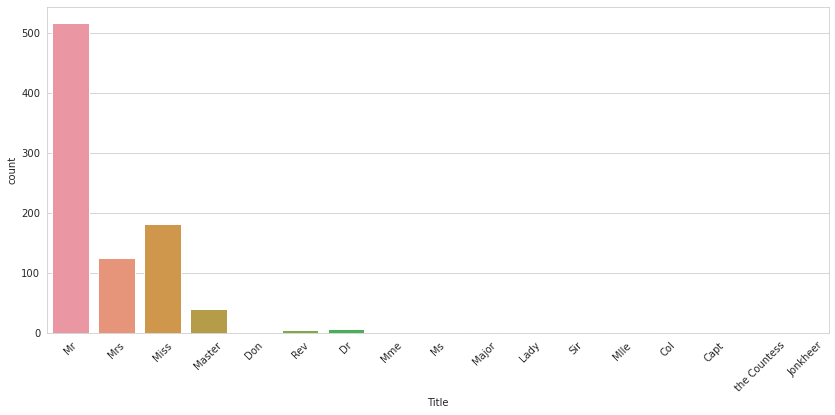

In [32]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="Title",data=train)
g = plt.setp(g.get_xticklabels(), rotation=45) 

#### Here we have our titles mapped with numeric values.

In [33]:
train["Title"] = train["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train["Title"] = train["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train["Title"] = train["Title"].astype(int)
test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test["Title"] = test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
test["Title"] = test["Title"].astype(int)

## 9. Ticket

### This column has the ticket number of all the passengers. Here we will be taking the ticket prefix.

In [34]:
Ticket1 = []
for i in list(train.Ticket):
    if not i.isdigit() :
        Ticket1.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket1.append("X")
train["Ticket"] = Ticket1

Ticket2 = []
for j in list(test.Ticket):
    if not j.isdigit() :
        Ticket2.append(j.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket2.append("X")
test["Ticket"] = Ticket2

### Here is a tricky part. The training set and test set have a few tickets which are unique to themselves.

In [35]:
train["Ticket"].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [36]:
test["Ticket"].unique()

array(['X', 'A4', 'WEP', 'SCPARIS', 'STONO2', 'PC', 'C', 'A5', 'SCAH',
       'CA', 'WC', 'SOTONOQ', 'STONO', 'SCA3', 'FCC', 'FC', 'PP',
       'STONOQ', 'SCA4', 'SOPP', 'SOC', 'SOTONO2', 'AQ4', 'A', 'SC',
       'SCParis', 'LP', 'AQ3'], dtype=object)

In [37]:
 np.union1d(train["Ticket"], test["Ticket"])

array(['A', 'A4', 'A5', 'AQ3', 'AQ4', 'AS', 'C', 'CA', 'CASOTON', 'FC',
       'FCC', 'Fa', 'LINE', 'LP', 'PC', 'PP', 'PPP', 'SC', 'SCA3', 'SCA4',
       'SCAH', 'SCOW', 'SCPARIS', 'SCParis', 'SOC', 'SOP', 'SOPP',
       'SOTONO2', 'SOTONOQ', 'SP', 'STONO', 'STONO2', 'STONOQ', 'SWPP',
       'WC', 'WEP', 'X'], dtype=object)

### These above tickets are common in both the sets.

In [38]:
train= pd.get_dummies(train, columns = ["Ticket"], prefix="T")
test = pd.get_dummies(test, columns = ["Ticket"], prefix="T")

### In order to maintain the same number of columns I had to tamper the test set and had to remove these unique tickets. Same was done with training set.

### These are the following unique tickets which are dropped.

In [39]:
train = train.drop(['T_SP','T_SOP','T_Fa','T_LINE','T_SWPP','T_SCOW','T_PPP','T_AS','T_CASOTON'],axis = 1)
test = test.drop(['T_SCA3','T_STONOQ','T_AQ4','T_A','T_LP','T_AQ3'],axis = 1)

In [40]:
train.drop(['Survived'],axis=1,inplace=True)

In [41]:
train.head(5)

,Pclass,Age,Fare,Cabin,male,C,Q,S,Family,Title,...,T_SCParis,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_WC,T_WEP,T_X
0,3,22.0,7.2500,0,1,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,71.2833,3,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,26.0,7.9250,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,35.0,53.1000,3,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,8.0500,0,1,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,1


### This is our final training set after preprocessing.

### Note: In the above feature preprocessing, the values that I have used for filling missing values were chosen after experimenting with different values. I took these values as they gave me the best result. Median values are best suited for missing values in most of the Machine-Learning models.

## Checking for missing values for the new dataframes

In [42]:
print(train.isnull().sum())
print("Number of columns are :",train.isnull().sum().count())

Pclass       0
Age          0
Fare         0
Cabin        0
male         0
C            0
Q            0
S            0
Family       0
Title        0
T_A4         0
T_A5         0
T_C          0
T_CA         0
T_FC         0
T_FCC        0
T_PC         0
T_PP         0
T_SC         0
T_SCA4       0
T_SCAH       0
T_SCPARIS    0
T_SCParis    0
T_SOC        0
T_SOPP       0
T_SOTONO2    0
T_SOTONOQ    0
T_STONO      0
T_STONO2     0
T_WC         0
T_WEP        0
T_X          0
dtype: int64
Number of columns are : 32


In [43]:
print(test.isnull().sum())
print("Number of columns are :",test.isnull().sum().count())

Pclass       0
Age          0
Fare         0
Cabin        0
male         0
C            0
Q            0
S            0
Family       0
Title        0
T_A4         0
T_A5         0
T_C          0
T_CA         0
T_FC         0
T_FCC        0
T_PC         0
T_PP         0
T_SC         0
T_SCA4       0
T_SCAH       0
T_SCPARIS    0
T_SCParis    0
T_SOC        0
T_SOPP       0
T_SOTONO2    0
T_SOTONOQ    0
T_STONO      0
T_STONO2     0
T_WC         0
T_WEP        0
T_X          0
dtype: int64
Number of columns are : 32


### We can now proceed further as there are no missing values in the training and test set.

## Feature Scaling with Standardization
  

### Applying standarization as part of our data normalization.

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train2 = sc.fit_transform(train)
test2 = sc.transform(test)

# Model Training 

### In this section we will be training various models using different classifiers. Out of them all, we will be choosing the best classifier to give us the most accurate prediction.

In [45]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

KFold_Score = pd.DataFrame()
classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
               'RandomForestClassifier', 'AdaBoostClassifier', 
               'XGBoostClassifier', 'KNeighborsClassifier','GradientBoostingClassifier']
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          xgb.XGBClassifier(n_estimators=100),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)
         ]
j = 0
for i in models:
    model = i
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    KFold_Score[classifiers[j]] = (cross_val_score(model, train, np.ravel(pred), scoring = 'accuracy', cv=cv))
    j = j+1

### Using K-Folds Cross validation to evaluate the prformance of our models

In [46]:
mean = pd.DataFrame(KFold_Score.mean(), index= classifiers)
KFold_Score = pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.837989,0.848315,0.842697,0.842697,0.820225,0.838384
GradientBoostingClassifier,0.843575,0.814607,0.825843,0.825843,0.803371,0.822648
XGBoostClassifier,0.837989,0.808989,0.842697,0.814607,0.786517,0.818160
LogisticRegression,0.810056,0.786517,0.814607,0.808989,0.825843,0.809202
AdaBoostClassifier,0.810056,0.792135,0.780899,0.786517,0.814607,0.796843
Linear SVM,0.787709,0.769663,0.792135,0.786517,0.803371,0.787879
KNeighborsClassifier,0.720670,0.707865,0.707865,0.685393,0.679775,0.700314
Radial SVM,0.709497,0.640449,0.719101,0.685393,0.606742,0.672237


### Here RandomForestClassifier is giving the highest accuracy.

# Hyperparameter Tuning 

### This is the most important section of this project. Here, the ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.

## Important Note:
### I had done this project 3 months before creating this notebook. After completing it I experimented with 'Hyperparamter Tuning' as well as 'Principle Component Analysis' to get a better score. When I finally got my best result I decided to make a notebook on kaggle. While creating this project I had made a few changes in the order of preprocessing, due to which the "Fare" column and "Pclass" column had their positions interchanged. I did not realise it before but on training the model with the same hyperparamters I was getting a lower accuracy. I was suprised by the fact that even with the columns interchanging we get a different prediction result. Hence inorder to overcome this problem I interchanged the 2 columns.   

In [47]:
col_name1 = list(train.columns)
col_name2 = list(test.columns)

In [48]:
col_name1[0],col_name1[2] = col_name1[2],col_name1[0]
col_name2[0],col_name2[2] = col_name2[2],col_name2[0]

In [49]:
train_new = train[col_name1]
test_new = test[col_name2]

## Important Note:
### As I had mentioned earlier in feature preprocessing, the "Cabin" column does not help us in getting a better prediction and here is why:-
### First of all we need to understand that this is a "Survival Prediction". Many things took place at the actually event which we don't have an account of. 

![](http://www.historyonthenet.com/wp-content/uploads/2014/08/MGY_Cutaway2.JPG)

### This is a picture of the Titanic which has mapped various locations such as dining room ,quarters ,etc. of the ship. In an actual sinking emergency (just like the one here) all the passengers irrespective of their cabin would gather around at the port side and starboard side of the ship for evacuation. Similar thing must have happened with Titanic. Therefore it does not matter which cabin you are occupying.
### Women and children had the first preference, along with them there were people who belonged to the higher class. This data is covered under the "Sex" , "Pclass" and "Age" column. 

### Considering this I droped the "Cabin" column.

In [50]:
train_new = train_new.drop(['Cabin'],axis = 1)
test_new = test_new.drop(['Cabin'],axis = 1)

In [51]:
sc = StandardScaler()
train3 = sc.fit_transform(train_new)
test3 = sc.transform(test_new)

### Applying RandomForestClassifier with hyperparameter tuning on our new training set.

### Note: I have performed numerous permutations with various hyperparameters but the given following are the ones which gave me the best result.

In [52]:
rfc = RandomForestClassifier(random_state=0)

In [53]:
param_grid = { 
    'n_estimators': [ 200,300],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}

In [54]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train3,pred )
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [55]:
rfc1=RandomForestClassifier(random_state=0, n_estimators= 200, criterion = 'gini',max_features = 'auto',max_depth = 8)
rfc1.fit(train3, pred)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=0)

In [56]:
pred3= rfc1.predict(test3)
print(pred3)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1]


#### This result got me **Top 4%**.

In [57]:
pred_test = pred3
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_test})
output.to_csv('./submission.csv', index=False)

## Final Note:
### I have experimented a lot with this project and tried many different things.I also used Neural Netowrks and Ensembling models to get a better prediction result. But most of my efforts have been in Hyperparamter tuning. Initially I had included more parameters thinking that it would give me better result. But if you do a lot of hyperparamter tuning the model will not give a good result on the test set as it will be fine-tuned for the training set. 
### So try your best in getting a better prediction and let me know what gave you a better result :)